first few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


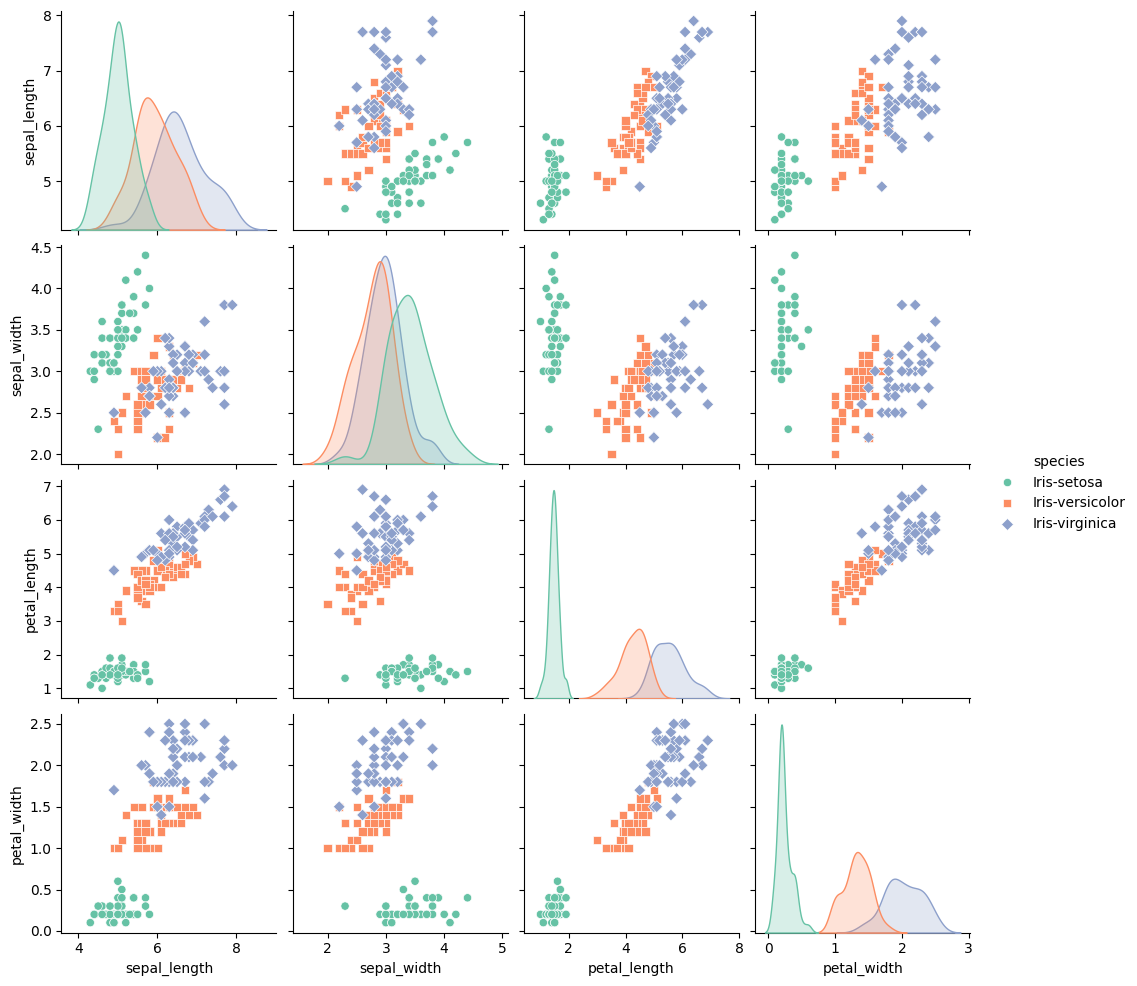

Missing values in the dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Accuracy:1.00
Confusion Matrix:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



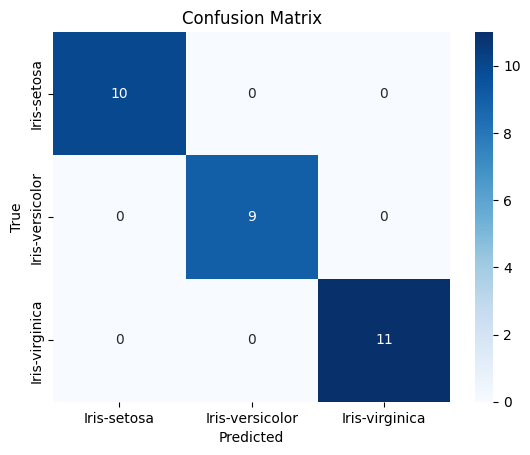

In [6]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#step1:define the URL of the dataset and download it 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#define column names as the dataset does not have a header
column_names=['sepal_length','sepal_width','petal_length','petal_width','species']

#load the dataset into a dataframe
iris_df=pd.read_csv(url,header=None,names=column_names)

#save the dataframe to a csv file in the current directory
iris_df.to_csv('iris_dataset.csv',index=False)

#display the 1st few rows of the dataframe
print("first few rows of the dataset:")
print(iris_df.head())

#step2:convert to a dataframe for easier manipulation(using the already loaded dataframe)
X=iris_df.iloc[:, :-1].values #features(all columns except the last)
y=iris_df.iloc[:, -1].values #labels (last column -species)

#step3:Exploratory data analysis(EDA)
#visualize pairplots to see relationships between features and species 
sns.pairplot(iris_df,hue='species',palette='Set2',markers=["o","s","D"])
plt.show()

#step4:data preprocessing
#check for missing values (there should be none in this dataset)
print("Missing values in the dataset:")
print(iris_df.isnull().sum())

#step5: Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#step6:Model building -K-Nearest Neighbors (KNN) classifier with 3 neighbors 
knn_model=KNeighborsClassifier(n_neighbors=3)
#train the model using the training data
knn_model.fit(X_train,y_train)

#step7:model evaluation
#make predictions on the test set
y_pred=knn_model.predict(X_test)
#evaluate the model
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)

#print evaluation metriccs
print(f'Accuracy:{accuracy:.2f}')
print(f'Confusion Matrix:\n{classification}')
print(f'Classification Report:\n{classification}')

#Optional: plot the confusion matrix for better visualization
sns.heatmap(confusion,annot=True,cmap='Blues',fmt='g',xticklabels=np.unique(y),yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
